# Daily consumption patterns

Comparison of the daily consumption pattern between the 300 customers.
The daily pattern is the average over one year of the consumption at each half-hour of the day.

Clustering analysis is applied to identify the common daily patterns. K-means algorithm works the best. Indeed, this pattern clustering is in fact closer to a **quantization** of patterns.

Possible extension: 

* make serate averaging for weekday vs. weekend, or winter vs. summer.
* also look at controlled load (CL)

See also exploration of [yearly patterns](Pattern_yearly.ipynb).

PH May-June 2017

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans, DBSCAN

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Load dataset

In [2]:
import solarhome as sh

takes ~ 1 min

In [3]:
df_raw = sh.read_csv('2011-2012')
df, missing_rec = sh.reshape(df_raw)

In [4]:
missing_rec

[(11, 'CL', 0),
 (12, 'CL', 0),
 (13, 'CL', 0),
 (16, 'CL', 0),
 (17, 'CL', 0),
 (20, 'CL', 0),
 (21, 'CL', 0),
 (22, 'CL', 0),
 (24, 'CL', 0),
 (25, 'CL', 0),
 (26, 'CL', 0),
 (27, 'CL', 9408),
 (28, 'CL', 0),
 (31, 'CL', 0),
 (32, 'CL', 0),
 (33, 'CL', 0),
 (34, 'CL', 0),
 (38, 'CL', 0),
 (40, 'CL', 0),
 (44, 'CL', 0),
 (45, 'CL', 0),
 (46, 'CL', 0),
 (47, 'CL', 0),
 (48, 'CL', 0),
 (50, 'CL', 0),
 (52, 'CL', 0),
 (55, 'CL', 0),
 (57, 'CL', 0),
 (58, 'CL', 0),
 (60, 'CL', 0),
 (62, 'CL', 0),
 (63, 'CL', 0),
 (67, 'CL', 0),
 (72, 'CL', 0),
 (74, 'CL', 0),
 (76, 'CL', 0),
 (78, 'CL', 0),
 (79, 'CL', 0),
 (80, 'CL', 0),
 (82, 'CL', 0),
 (83, 'CL', 0),
 (85, 'CL', 0),
 (86, 'CL', 0),
 (89, 'CL', 0),
 (90, 'CL', 0),
 (91, 'CL', 0),
 (92, 'CL', 0),
 (93, 'CL', 0),
 (97, 'CL', 0),
 (100, 'CL', 0),
 (101, 'CL', 0),
 (102, 'CL', 0),
 (103, 'CL', 0),
 (104, 'CL', 0),
 (106, 'CL', 0),
 (109, 'CL', 0),
 (111, 'CL', 0),
 (113, 'CL', 0),
 (114, 'CL', 0),
 (115, 'CL', 0),
 (116, 'CL', 0),
 (117, 'C

Split the two consumption channel: 

* general consumption
* controlled load

In [5]:
dfGC = df.xs('GC', level='Channel', axis=1)
dfCL = df.xs('CL', level='Channel', axis=1)

### Daily pattern of general (uncontrolled) consumption

average over the year for each half-hour of the day

In [6]:
def hod(tstamp):
    'hour of the day (fractional))'
    return tstamp.hour + tstamp.minute/60

dfGC_dpat = dfGC.groupby(by=hod).mean()

In [7]:
dfGC_dpat

Customer,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0.0,0.768208,0.503940,0.340093,0.245590,0.241202,0.479694,0.359831,0.349475,0.099683,0.252716,...,0.788344,0.142902,0.452896,0.398787,0.385689,0.105443,0.496175,0.260705,0.411852,1.358087
0.5,0.605486,0.434131,0.295978,0.239842,0.220585,0.466940,0.294891,0.321678,0.097383,0.240842,...,0.713913,0.132743,0.442350,0.354574,0.344344,0.101251,0.489339,0.227962,0.350339,1.299536
1.0,0.577962,0.393590,0.254628,0.232169,0.207902,0.451749,0.271290,0.320607,0.097634,0.229995,...,0.623694,0.144940,0.424383,0.313131,0.307913,0.100634,0.479568,0.199060,0.309459,0.961361
1.5,0.487301,0.380339,0.235656,0.238366,0.191279,0.454481,0.274186,0.313186,0.098738,0.217175,...,0.578508,0.133197,0.420885,0.292044,0.255005,0.097284,0.470563,0.177738,0.303836,0.466798
2.0,0.476158,0.364421,0.212809,0.231858,0.189311,0.457732,0.274809,0.306628,0.096005,0.215962,...,0.543284,0.159027,0.428388,0.279546,0.224694,0.098213,0.469115,0.165760,0.297721,0.407596
2.5,0.472984,0.339852,0.199776,0.240131,0.184153,0.464721,0.272197,0.298634,0.095956,0.209858,...,0.520579,0.176432,0.443279,0.281727,0.199219,0.100503,0.458847,0.162290,0.293022,0.380978
3.0,1.435158,0.336093,0.196590,0.235765,0.184366,0.473842,0.275257,0.287803,0.094776,0.206858,...,0.512590,0.163710,0.492279,0.274071,0.178257,0.095656,0.457126,0.160497,0.292623,0.362661
3.5,1.053672,0.338749,0.193344,0.233202,0.180973,0.474284,0.277973,0.281213,0.094011,0.207486,...,0.498268,0.175579,0.920306,0.281333,0.170776,0.097257,0.446710,0.158022,0.296934,0.347410
4.0,0.885377,0.336246,0.191350,0.229153,0.188355,0.483470,0.281246,0.282322,0.091869,0.204361,...,0.487579,0.225273,1.198896,0.312071,0.168262,0.094536,0.438967,0.152891,0.302448,0.348885
4.5,0.382262,0.388393,0.195809,0.231710,0.219372,0.490678,0.276825,0.284721,0.092967,0.197322,...,0.471874,0.188596,1.726109,0.403710,0.163945,0.093404,0.434027,0.154066,0.294667,0.344760


Plot the pattern

In [8]:
loc_6h = mpl.ticker.MultipleLocator(6)

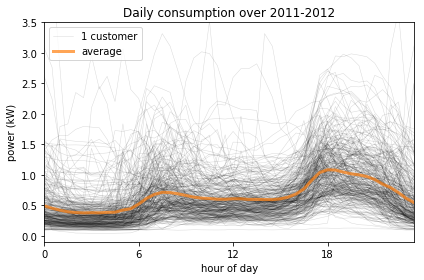

In [9]:
ax = dfGC_dpat.plot(color='k', alpha=0.15, lw=0.5)
dfGC_dpat.mean(axis=1).plot(color='tab:orange', lw=3, alpha=0.7)

ax.xaxis.set_major_locator(loc_6h)
plt.legend(ax.lines[-2:], ['1 customer', 'average'])
ax.set(
    xlabel='hour of day',
    ylabel='power (kW)',
    ylim=(-0.1, 3.5),
    title='Daily consumption over 2011-2012'
    );

plt.tight_layout()
plt.savefig('GC_day.png', dpi=150);

### *normalized* daily pattern


Normalize the daily ernergy of each customer

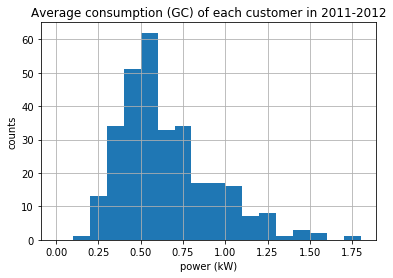

In [10]:
dfGC_dpat.mean().hist(bins=np.linspace(0,1.8, 19))
plt.title('Average consumption (GC) of each customer in 2011-2012')
plt.xlabel('power (kW)'); plt.ylabel('counts');

In [11]:
dfGC_dpat_norm = dfGC_dpat/dfGC_dpat.mean()

In [12]:
dfGC_dpat_norm

Customer,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0.0,1.314477,0.726692,1.072943,0.593766,0.675035,0.540322,0.769123,0.346723,0.339553,0.599431,...,1.205084,0.385126,0.375988,0.618772,1.080161,0.325618,0.860320,0.686873,0.432756,1.220841
0.5,1.036045,0.626026,0.933767,0.579868,0.617335,0.525956,0.630316,0.319144,0.331717,0.571265,...,1.091305,0.357748,0.367232,0.550169,0.964372,0.312675,0.848467,0.600606,0.368120,1.168206
1.0,0.988948,0.567565,0.803315,0.561319,0.581839,0.508845,0.579870,0.318082,0.332573,0.545537,...,0.953395,0.390619,0.352316,0.485865,0.862341,0.310769,0.831526,0.524459,0.325165,0.864207
1.5,0.833818,0.548456,0.743459,0.576301,0.535318,0.511922,0.586060,0.310720,0.336333,0.515129,...,0.884323,0.358970,0.349413,0.453145,0.714169,0.300424,0.815911,0.468282,0.319257,0.419624
2.0,0.814753,0.525502,0.671380,0.560566,0.529813,0.515585,0.587392,0.304214,0.327026,0.512252,...,0.830478,0.428585,0.355641,0.433754,0.629279,0.303293,0.813400,0.436723,0.312832,0.366405
2.5,0.809320,0.490074,0.630264,0.580568,0.515376,0.523457,0.581809,0.296282,0.326858,0.497774,...,0.795771,0.475490,0.368004,0.437137,0.557932,0.310364,0.795597,0.427581,0.307894,0.342477
3.0,2.455693,0.484653,0.620213,0.570012,0.515972,0.533730,0.588350,0.285537,0.322838,0.490658,...,0.783559,0.441206,0.408683,0.425258,0.499227,0.295395,0.792612,0.422859,0.307475,0.326011
3.5,1.802934,0.488482,0.609972,0.563816,0.506475,0.534228,0.594155,0.278999,0.320232,0.492148,...,0.761665,0.473193,0.764025,0.436527,0.478276,0.300340,0.774553,0.416337,0.312005,0.312301
4.0,1.514965,0.484873,0.603680,0.554026,0.527136,0.544575,0.601151,0.280099,0.312935,0.484734,...,0.745326,0.607120,0.995306,0.484220,0.471236,0.291936,0.761127,0.402818,0.317799,0.313627
4.5,0.654087,0.560071,0.617748,0.560209,0.613940,0.552694,0.591702,0.282479,0.316677,0.468040,...,0.721319,0.508273,1.432991,0.626411,0.459146,0.288443,0.752562,0.405913,0.309622,0.309919


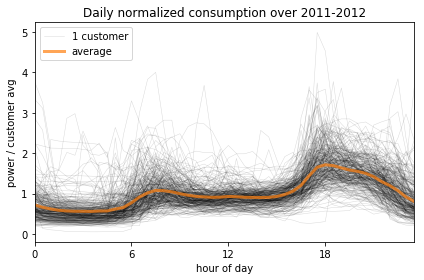

In [14]:
ax = dfGC_dpat_norm.plot(color='k', alpha=0.15, lw=0.5)
dfGC_dpat_norm.mean(axis=1).plot(color='tab:orange', lw=3, alpha=0.7)

ax.xaxis.set_major_locator(loc_6h)
plt.legend(ax.lines[-2:], ['1 customer', 'average'])
ax.set(
    xlabel='hour of day',
    ylabel='power / customer avg',
    title='Daily normalized consumption over 2011-2012'
    );

plt.tight_layout()
plt.savefig('GC_day_norm.png', dpi=150);

### Daily pattern of *controlled* consumption

Observation: controlled load is mostly triggered during the night (complementary to general consumption)

In [15]:
dfCL_dpat = dfCL.groupby(by=hod).mean()

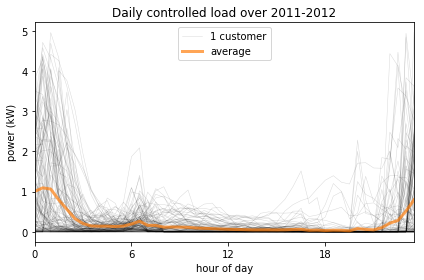

In [16]:
ax = dfCL_dpat.plot(color='k', alpha=0.15, lw=0.5)
dfCL_dpat.mean(axis=1).plot(color='tab:orange', lw=3, alpha=0.7)

ax.xaxis.set_major_locator(loc_6h)
plt.legend(ax.lines[-2:], ['1 customer', 'average'])
ax.set(
    xlabel='hour of day',
    ylabel='power (kW)',
    title='Daily controlled load over 2011-2012'
    );

plt.tight_layout()
plt.savefig('CL_day.png', dpi=150);

### *normalized* daily pattern


Notice that the average controlled load of each customer has *more spread* (std/mean) than global consumption

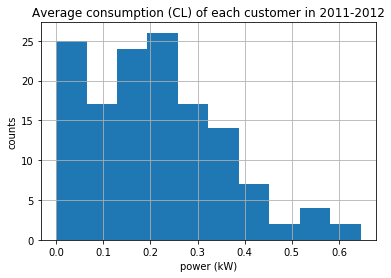

In [17]:
dfCL_dpat.mean().hist()
plt.title('Average consumption (CL) of each customer in 2011-2012')
plt.xlabel('power (kW)'); plt.ylabel('counts');

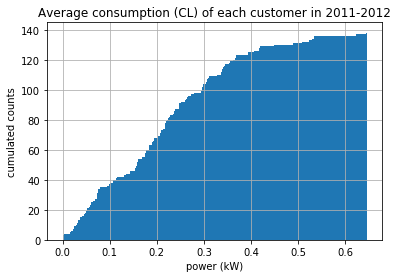

In [18]:
dfCL_dpat.mean().hist(cumulative=True, bins=300)
plt.title('Average consumption (CL) of each customer in 2011-2012')
plt.xlabel('power (kW)'); plt.ylabel('cumulated counts');

Filter-out customer with very low average CL 

In [19]:
low_CL = (dfCL_dpat.mean()<1e-3)
low_CL.sum()

2

In [20]:
dfCL_dpat_norm = dfCL_dpat/dfCL_dpat.mean()
dfCL_dpat_norm = dfCL_dpat_norm.loc[:,~low_CL]

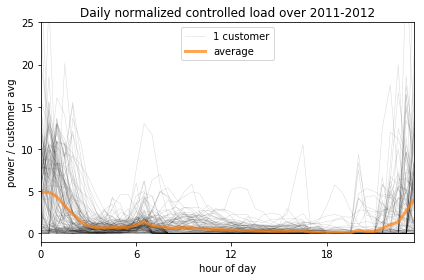

In [22]:
ax = dfCL_dpat_norm.plot(color='k', alpha=0.15, lw=0.5)
dfCL_dpat_norm.mean(axis=1).plot(color='tab:orange', lw=3, alpha=0.7)

ax.xaxis.set_major_locator(loc_6h)
plt.legend(ax.lines[-2:], ['1 customer', 'average'])
ax.set(
    xlabel='hour of day',
    ylabel='power / customer avg',
    ylim=(-1, 25),
    title='Daily normalized controlled load over 2011-2012'
    );

plt.tight_layout()
plt.savefig('CL_day_norm.png', dpi=150);

## Clustering of daily patterns

Objective: highlight "types" of customers, based on the difference in their daily pattern.

Comparison of clustering results between:

* using normarlized vs. non normalized pattern
* using different clustering algorithms (cf. [scikit-learn guide on clustering](http://scikit-learn.org/stable/modules/clustering.html))

### Feature matrix

As a preamble, create feature matrix, in the standardized format of sckit-learn, i.e. (n_samples, n_features). Here:

* n_samples is the number of customers (300)
* n_features is the number of time steps per day (48)

In [23]:
X = dfGC_dpat.transpose()
Xn = dfGC_dpat_norm.transpose()

### K-means

#### K-means with 2 clusters

In [24]:
km_2 = KMeans(2).fit(X)
pd.Series.value_counts(km_2.labels_)

0    204
1     96
dtype: int64

In [25]:
km_2n = KMeans(2).fit(Xn)
pd.Series.value_counts(km_2n.labels_)

1    189
0    111
dtype: int64

In [26]:
t_hod = dfGC_dpat.index

def plot_daily_cluster(cl, X, **ax_kwarg):
    '''plot clusters of classifier `cl` with data `X`'''
    labels = cl.labels_
    
    # samples, colored with their membership
    for k in np.unique(labels):
        color = 'C{}'.format(k) if k>=0 else 'black'
        plt.plot(t_hod, X.iloc[labels == k, :].T,
                 color=color, alpha=0.3, lw=0.5,
                 #drawstyle='steps-post',
                );

    # cluster centers
    for k in np.unique(labels):
        n_member = np.sum(labels == k)
        if k>=0:
            color = 'C{}'.format(k)
            plt.plot(t_hod, cl.cluster_centers_[k],
                     label='{} ({})'.format(k, n_member),
                     color=color, lw=3);

    ax = plt.gca()
    ax.set(
        xlim=(0, 24),
        xlabel='hour of day'
    )
    ax.xaxis.set_major_locator(loc_6h);
    ax.set(**ax_kwarg)
    plt.tight_layout()
    plt.legend()

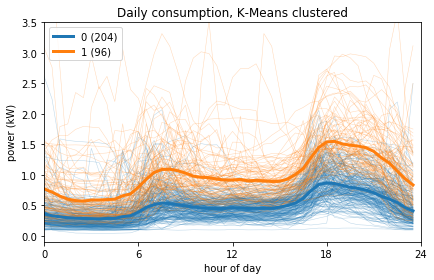

In [27]:
plot_daily_cluster(km_2, X,
                   title='Daily consumption, K-Means clustered',
                   ylabel='power (kW)')
plt.ylim(-0.1, 3.5)
plt.savefig('GC_day_KM2.png', dpi=150)

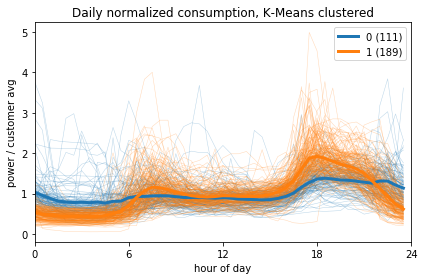

In [28]:
plot_daily_cluster(km_2n, Xn,
                   title='Daily normalized consumption, K-Means clustered',
                   ylabel='power / customer avg')
plt.savefig('GC_day_norm_KM2.png', dpi=150)

#### K-means, 3 clusters

In [29]:
km_3 = KMeans(3).fit(X)
pd.Series.value_counts(km_3.labels_)

2    152
0     95
1     53
dtype: int64

In [30]:
km_3n = KMeans(3).fit(Xn)
pd.Series.value_counts(km_3n.labels_)

0    105
1     99
2     96
dtype: int64

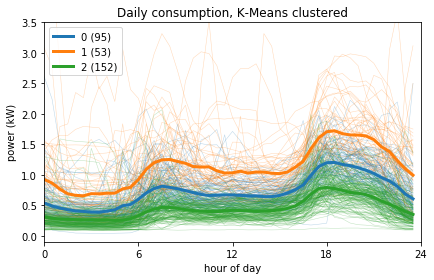

In [31]:
plot_daily_cluster(km_3, X,
                   title='Daily consumption, K-Means clustered',
                   ylabel='power (kW)')
plt.ylim(-0.1, 3.5)
plt.savefig('GC_day_KM3.png', dpi=150)

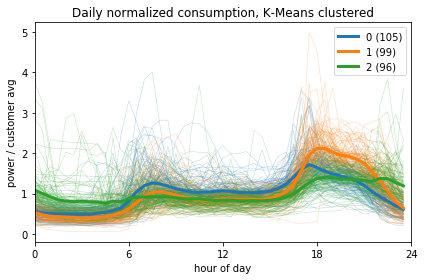

In [32]:
plot_daily_cluster(km_3n, Xn,
                   title='Daily normalized consumption, K-Means clustered',
                   ylabel='power / customer avg')
plt.savefig('GC_day_norm_KM3.png', dpi=150)

#### K-means, 4 clusters

In [33]:
km_4 = KMeans(4).fit(X)
pd.Series.value_counts(km_4.labels_)

3    117
0    109
2     42
1     32
dtype: int64

In [34]:
km_4n = KMeans(4).fit(Xn)
pd.Series.value_counts(km_4n.labels_)

1    95
3    86
2    85
0    34
dtype: int64

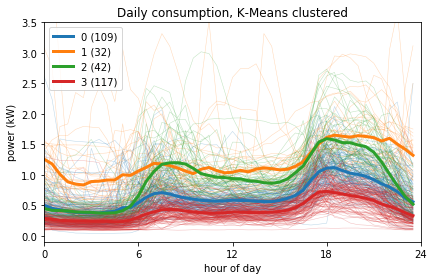

In [35]:
plot_daily_cluster(km_4, X,
                   title='Daily consumption, K-Means clustered',
                   ylabel='power (kW)')
plt.ylim(-0.1, 3.5)
plt.savefig('GC_day_KM4.png', dpi=150)

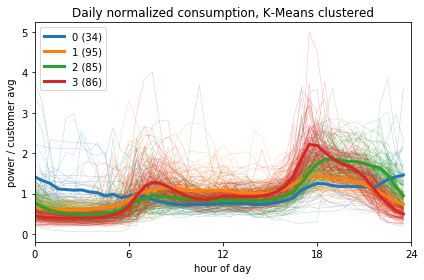

In [36]:
plot_daily_cluster(km_4n, Xn,
                   title='Daily normalized consumption, K-Means clustered',
                   ylabel='power / customer avg')
plt.savefig('GC_day_norm_KM4.png', dpi=150)

### Mean shift clustering

http://scikit-learn.org/stable/modules/clustering.html#mean-shift

observation: doesn't seems to work with this time series. Labels are very unequally assigned. Possible explanation: an underlying assumption of this algo (e.g. distribution of data?) is violated.

In [37]:
estimate_bandwidth(X.values, quantile=0.5)

2.9099799609484838

In [38]:
estimate_bandwidth(Xn.values, quantile=0.5)

3.0076198527639555

In [39]:
ms = MeanShift(bandwidth=4, cluster_all=True).fit(X)
pd.Series.value_counts(ms.labels_)

0    280
2     13
3      3
1      3
4      1
dtype: int64

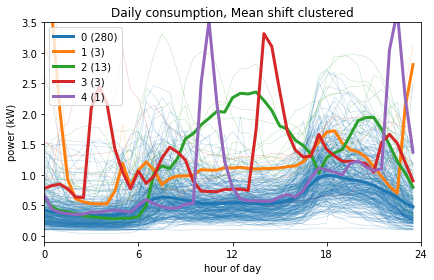

In [40]:
plot_daily_cluster(ms, X,
                   title='Daily consumption, Mean shift clustered',
                   ylabel='power (kW)')
plt.ylim(-0.1, 3.5);

In [41]:
ms_n = MeanShift(bandwidth=3.4, cluster_all=True).fit(Xn)
pd.Series.value_counts(ms_n.labels_)

0    293
4      4
3      1
2      1
1      1
dtype: int64

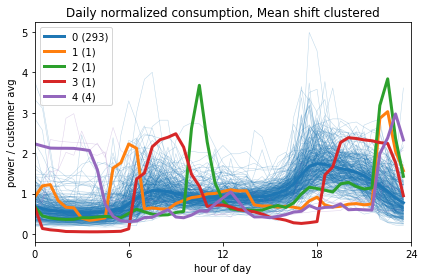

In [42]:
plot_daily_cluster(ms_n, Xn,
                   title='Daily normalized consumption, Mean shift clustered',
                   ylabel='power / customer avg')
plt.savefig('GC_day_norm_MS3.4.png', dpi=150)

In [43]:
ms_n = MeanShift(bandwidth=3.4, cluster_all=False).fit(Xn)
pd.Series.value_counts(ms_n.labels_)

 0    268
-1     28
 1      1
 4      1
 3      1
 2      1
dtype: int64

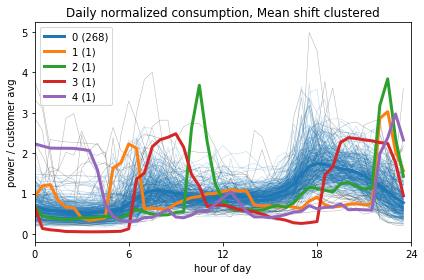

In [44]:
plot_daily_cluster(ms_n, Xn,
                   title='Daily normalized consumption, Mean shift clustered',
                   ylabel='power / customer avg')
plt.savefig('GC_day_norm_MS3.4_notall.png', dpi=150)

### DBScan

http://scikit-learn.org/stable/modules/clustering.html#dbscan

doesn't work at all

In [45]:
db = DBSCAN(eps=3, min_samples=5, metric='l2').fit(Xn)

In [46]:
len(db.core_sample_indices_)

284

In [47]:
labels = db.labels_
pd.value_counts(labels)

 0    291
-1      9
dtype: int64

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

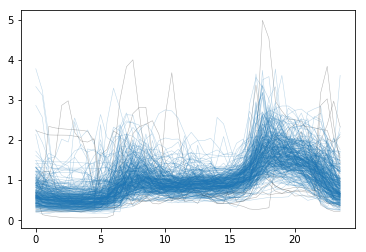

In [48]:
plot_daily_cluster(db, Xn,
                   title='Daily normalized consumption, Mean shift clustered',
                   ylabel='power / customer avg')

## Clustering of daily *controlled* load

In [50]:
C = dfCL_dpat.transpose()
Cn = dfCL_dpat_norm.transpose()

#### K-means with 2 clusters

In [51]:
km_2 = KMeans(2).fit(C)
pd.Series.value_counts(km_2.labels_)

1    97
0    41
dtype: int64

In [52]:
km_2n = KMeans(2).fit(Cn)
pd.Series.value_counts(km_2n.labels_)

1    77
0    59
dtype: int64

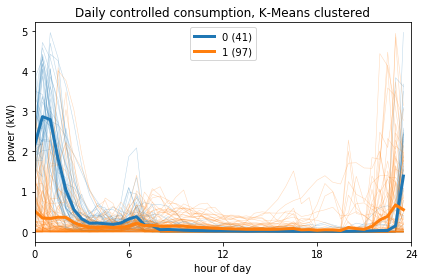

In [53]:
plot_daily_cluster(km_2, C,
                   title='Daily controlled consumption, K-Means clustered',
                   ylabel='power (kW)')
plt.savefig('CL_day_KM2.png', dpi=150)

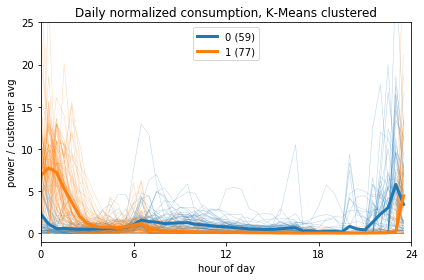

In [54]:
plot_daily_cluster(km_2n, Cn,
                   title='Daily normalized consumption, K-Means clustered',
                   ylabel='power / customer avg')
plt.ylim(-1, 25)
plt.savefig('CL_day_norm_KM2.png', dpi=150)

#### K-means, 3 clusters

In [55]:
km_3 = KMeans(3).fit(C)
pd.Series.value_counts(km_3.labels_)

2    80
1    41
0    17
dtype: int64

In [56]:
km_3n = KMeans(3).fit(Cn)
pd.Series.value_counts(km_3n.labels_)

1    59
0    43
2    34
dtype: int64

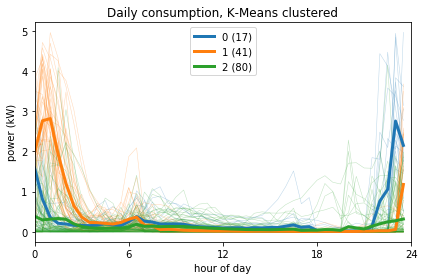

In [57]:
plot_daily_cluster(km_3, C,
                   title='Daily consumption, K-Means clustered',
                   ylabel='power (kW)')
plt.savefig('CL_day_KM3.png', dpi=150)

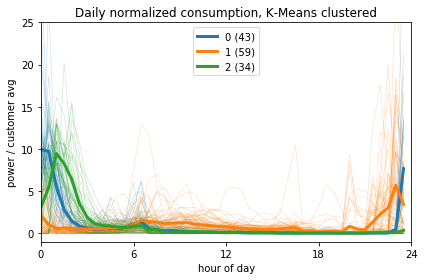

In [58]:
plot_daily_cluster(km_3n, Cn,
                   title='Daily normalized consumption, K-Means clustered',
                   ylabel='power / customer avg')
plt.ylim(-1, 25)
plt.savefig('CL_day_norm_KM3.png', dpi=150)

array([[ 0.12 ,  0.124,  0.12 , ...,  0.142,  0.11 ,  0.132],
       [ 0.136,  0.134,  0.142, ...,  0.124,  0.15 ,  0.122],
       [ 0.088,  0.084,  0.092, ...,  1.766,  1.542,  1.434],
       ..., 
       [ 0.104,  0.09 ,  0.206, ...,  0.118,  0.114,  0.128],
       [ 0.144,  0.152,  0.12 , ...,  0.724,  0.142,  0.122],
       [ 0.092,  0.762,  1.932, ...,  1.932,  1.914,  1.804]])

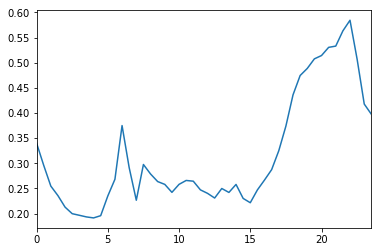

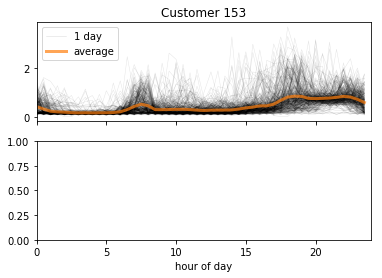

In [90]:
def customer_daily(c):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    hod_lin = np.arange(48)/2
    day_traj = dfGC[c].values.reshape((-1, 48)).T
    
    ax1.plot(hod_lin, day_traj, 'k', lw=0.5, alpha=0.1);
    dfGC_dpat[c].plot(color='tab:orange', lw=3, alpha=0.7, ax=ax1)
    ax1.legend(ax.lines[-2:], ['1 day', 'average'])
    ax1.set(
        title='Customer {}'.format(c)
    )
    ax2.set(
        xlim=(0, 24),
        xlabel='hour of day',
    )
    
customer_daily(153)

In [83]:
from ipywidgets import interact

<function __main__.customer_daily>

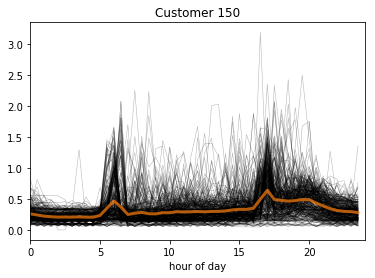

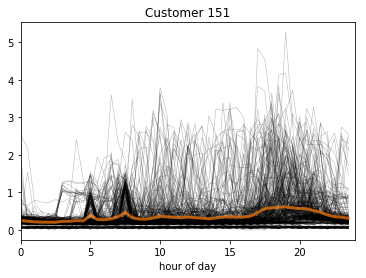

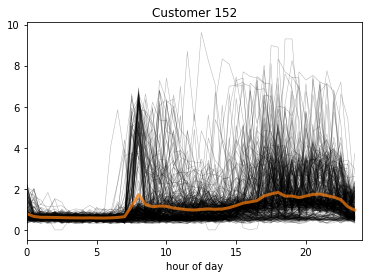

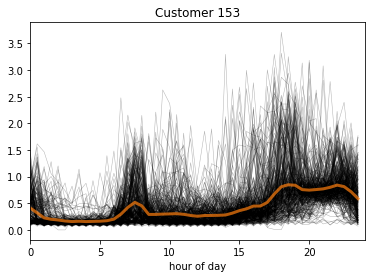

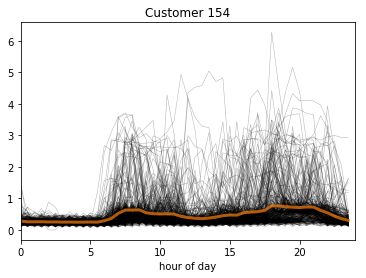

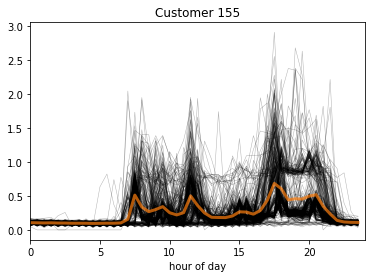

In [84]:
interact(customer_daily, c=(0,300,1))